# 서포트벡터머신

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix



In [2]:
df_raw=pd.read_csv('/home/pirl/test/4 weeks/유방암.csv')

In [3]:
df_raw.isnull().sum()

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [4]:
df_raw_y=df_raw['diagnosis']
df_raw_x=df_raw.drop('diagnosis', axis=1, inplace=False)

df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.6, random_state=1234)
df_validation_x,df_test_x,df_validation_y,df_test_y=train_test_split(df_test_x,df_test_y,test_size=0.5, random_state=1234)
print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("validation data X size:{}".format(df_validation_x.shape))
print("validation data Y size:{}".format(df_validation_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))

train data X size:(227, 30)
train data Y size:(227,)
validation data X size:(171, 30)
validation data Y size:(171,)
test data X size:(171, 30)
test data Y size:(171,)


In [5]:
svm_uncustomized=SVC(random_state=1234)
svm_uncustomized.fit(df_train_x,df_train_y)

print("Accuracy on training set:{:.3f}".format(svm_uncustomized.score(df_train_x, df_train_y)))

print("Accuracy on validation set:{:.3f}".format(svm_uncustomized.score(df_validation_x, df_validation_y)))


Accuracy on training set:1.000
Accuracy on validation set:0.667


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [6]:
svm_uncustomized

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=1234,
    shrinking=True, tol=0.001, verbose=False)

In [7]:
train_accuracy=[]; validation_accuracy=[]

para_c=[10**c for c in range(-2,2)]

for v_C in para_c:
    svm=SVC(C=v_C, random_state=1234)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    validation_accuracy.append(svm.score(df_validation_x,df_validation_y))
    
df_accuracy_c=pd.DataFrame()
df_accuracy_c['C']=para_c
df_accuracy_c['TrainAccuracy']=train_accuracy
df_accuracy_c['ValidationAccuracy']=validation_accuracy

df_accuracy_c.round(3)


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/

,C,TrainAccuracy,ValidationAccuracy
0,0.01,0.621,0.667
1,0.10,0.621,0.667
2,1.00,1.000,0.667
3,10.00,1.000,0.667


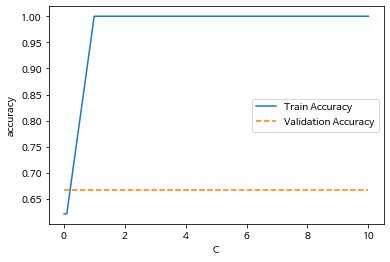

In [8]:
plt.plot(para_c,train_accuracy,linestyle='-', label='Train Accuracy')
plt.plot(para_c,validation_accuracy,linestyle='--', label='Validation Accuracy')
plt.ylabel('accuracy'); plt.xlabel('C')
plt.legend()

In [9]:
C=0.1
#C가 1 이상이면 train 데이터 이용한 모델의 정확도는 1로 과대적합. validation 정확도는 변화 없음.

In [10]:
train_accuracy=[]; validation_accuracy=[]

para_gamma=[10**gamma for gamma in range(-2,2)]

for v_gamma in para_gamma:
    svm=SVC(gamma=v_gamma, C=0.1, random_state=1234)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    validation_accuracy.append(svm.score(df_validation_x,df_validation_y))
    
df_accuracy_gamma=pd.DataFrame()
df_accuracy_gamma['gamma']=para_c
df_accuracy_gamma['TrainAccuracy']=train_accuracy
df_accuracy_gamma['ValidationAccuracy']=validation_accuracy

df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,ValidationAccuracy
0,0.01,0.621,0.667
1,0.10,0.621,0.667
2,1.00,0.621,0.667
3,10.00,0.621,0.667


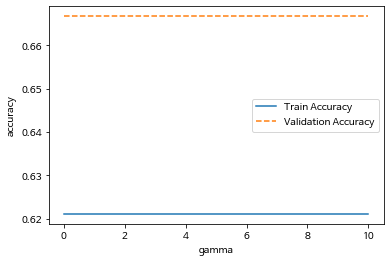

In [11]:
plt.plot(para_gamma, train_accuracy, linestyle='-',label='Train Accuracy')
plt.plot(para_gamma, validation_accuracy, linestyle='--',label='Validation Accuracy')
plt.ylabel('accuracy');plt.xlabel('gamma')
plt.legend()

In [12]:
# gamma 변화는 정확도에 영향을 미치지 않음

In [13]:
v_feature_name=df_train_x.columns

scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_raw_x)
df_scaled=pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [14]:
df_scaled_train_x,df_scaled_test_x=train_test_split(df_scaled,test_size=0.6,random_state=1234)
df_scaled_validation_x,df_scaled_test_x=train_test_split(df_scaled_test_x, test_size=0.5, random_state=1234)
print('train data X size:{}'.format(df_scaled_train_x.shape))
print("validation data X size:{}".format(df_scaled_validation_x.shape))
print('test data X size:{}'.format(df_scaled_test_x.shape))







train data X size:(227, 30)
validation data X size:(171, 30)
test data X size:(171, 30)


In [15]:
svm_scaled=SVC(random_state=1234)
svm_scaled.fit(df_scaled_train_x, df_train_y)

print("Accuracy on training set:{:.3f}".format(svm_scaled.score(df_scaled_train_x,df_train_y)))

print("Accuracy on validation set:{:.3f}".format(svm_scaled.score(df_scaled_validation_x,df_validation_y)))




Accuracy on training set:0.996
Accuracy on validation set:0.936


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [16]:
#scale 변환 전 training set의 정확도는 1로 더 높았지만 validation set의 정확도는 0.667에서 0.936으로 scale변환 후 더 증가한 것을 알 수 있다.

In [17]:
train_accuracy=[]; validation_accuracy=[]

para_c=[10**c for c in range(-2,2)]

for v_C in para_c:
    svm=SVC(C=v_C, random_state=1234)
    svm.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    validation_accuracy.append(svm.score(df_scaled_validation_x,df_validation_y))
    
df_accuracy_c=pd.DataFrame()
df_accuracy_c['C']=para_c
df_accuracy_c['TrainAccuracy']=train_accuracy
df_accuracy_c['ValidationAccuracy']=validation_accuracy

df_accuracy_c.round(3)


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/

,C,TrainAccuracy,ValidationAccuracy
0,0.01,0.621,0.667
1,0.10,0.965,0.912
2,1.00,0.996,0.936
3,10.00,0.996,0.959


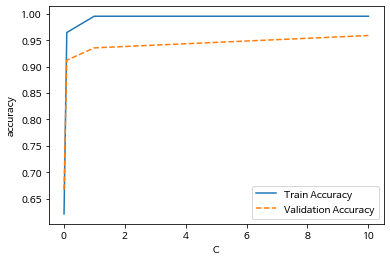

In [18]:
plt.plot(para_c,train_accuracy,linestyle='-', label='Train Accuracy')
plt.plot(para_c,validation_accuracy,linestyle='--', label='Validation Accuracy')
plt.ylabel('accuracy'); plt.xlabel('C')
plt.legend()

In [19]:
C=10
#C=10일때 모델의 정확도가 증가함.

In [20]:
train_accuracy=[]; validation_accuracy=[]

para_gamma=[10**gamma for gamma in range(-2,2)]

for v_gamma in para_gamma:
    svm=SVC(gamma=v_gamma, C=10, random_state=1234)
    svm.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    validation_accuracy.append(svm.score(df_scaled_validation_x,df_validation_y))
    
df_accuracy_gamma=pd.DataFrame()
df_accuracy_gamma['gamma']=para_c
df_accuracy_gamma['TrainAccuracy']=train_accuracy
df_accuracy_gamma['ValidationAccuracy']=validation_accuracy

df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,ValidationAccuracy
0,0.01,0.996,0.959
1,0.10,1.000,0.912
2,1.00,1.000,0.667
3,10.00,1.000,0.667


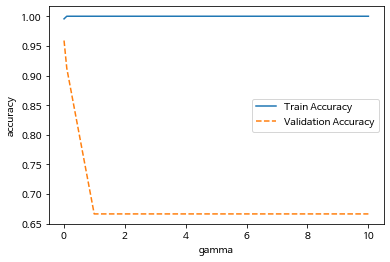

In [21]:
plt.plot(para_gamma, train_accuracy, linestyle='-',label='Train Accuracy')
plt.plot(para_gamma, validation_accuracy, linestyle='--',label='Validation Accuracy')
plt.ylabel('accuracy');plt.xlabel('gamma')
plt.legend()

In [22]:
gamma=0.01
#0.01보다 크면 과대적합되며 validation set의 정확도도 떨어짐.

In [23]:
svc_final=SVC(gamma=0.01,C=10, random_state=1234)

svc_final.fit(df_scaled_train_x, df_train_y)
y_pred=svc_final.predict(df_scaled_validation_x)

print('Accuracy on training set:{0:.3f}\n'.format(svc_final.score(df_scaled_train_x,df_train_y)))

print('Accuracy on validation set:{0:.3f}\n'.format(svc_final.score(df_scaled_validation_x,df_validation_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_validation_y,y_pred)))

Accuracy on training set:0.996

Accuracy on validation set:0.959

Confusion matrix:
[[113   1]
 [  6  51]]


In [24]:
estimator=SVC(random_state=1234)

param_grid={'C':para_c, 'gamma':para_gamma}

grid_rf=GridSearchCV(estimator,param_grid,scoring='accuracy', n_jobs=-1)
grid_rf.fit(df_scaled_train_x,df_train_y)

print('best estimator model:\n{}'.format(grid_rf.best_estimator_))
print("\nbest parameter:\n{}".format(grid_rf.best_params_))
print("\nbest score:\n{}".format(grid_rf.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model:
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=1234, shrinking=True,
    tol=0.001, verbose=False)

best parameter:
{'C': 1, 'gamma': 0.01}

best score:
0.969


In [25]:
y_pred=svc_final.predict(df_scaled_test_x)
print('Accuracy on test set:{0:.3f}\n'.format(svc_final.score(df_scaled_test_x,df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

Accuracy on test set:0.959

Confusion matrix:
[[102   0]
 [  7  62]]


In [26]:
'''
Accuracy on training set:0.996
Accuracy on validation set:0.959
Accuracy on test set:0.947
Confusion matrix:
[[102   0]
 [  9  60]]
 
최종적으로 C=10,gamma=0.01로 parameter를 선택하였으며 test set의 정확도는 0.947로 높은 편이다.
confusion matrix를 살펴보면, 악성인데 양성으로 예측한개수는 0이고, 양성인데 악성으로 잘못 예측한 것은 9이다.
유방암인데 유방암이 아니라고 예측한 경우는 없으므로, 비교적 모델이 잘 만들어졌다고 볼 수 있을 것 같다.
'''

'\nAccuracy on training set:0.996\nAccuracy on validation set:0.959\nAccuracy on test set:0.947\nConfusion matrix:\n[[102   0]\n [  9  60]]\n \n최종적으로 C=10,gamma=0.01로 parameter를 선택하였으며 test set의 정확도는 0.947로 높은 편이다.\nconfusion matrix를 살펴보면, 악성인데 양성으로 예측한개수는 0이고, 양성인데 악성으로 잘못 예측한 것은 9이다.\n유방암인데 유방암이 아니라고 예측한 경우는 없으므로, 비교적 모델이 잘 만들어졌다고 볼 수 있을 것 같다.\n'

# knn

In [27]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

import seaborn as sns

In [28]:
df_raw=pd.read_csv('/home/pirl/test/4 weeks/유방암.csv')

In [29]:
df_raw.isnull().sum()

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [30]:
df_raw_y=df_raw['diagnosis']
df_raw_x=df_raw.drop('diagnosis', axis=1, inplace=False)

df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.6, random_state=1234)
df_validation_x,df_test_x,df_validation_y,df_test_y=train_test_split(df_test_x,df_test_y,test_size=0.5, random_state=1234)
print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("validation data X size:{}".format(df_validation_x.shape))
print("validation data Y size:{}".format(df_validation_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))

train data X size:(227, 30)
train data Y size:(227,)
validation data X size:(171, 30)
validation data Y size:(171,)
test data X size:(171, 30)
test data Y size:(171,)


In [31]:
knn_uncustomized=KNeighborsClassifier()
knn_uncustomized.fit(df_train_x,df_train_y)



print("Accuracy on training set:{:.3f}".format(knn_uncustomized.score(df_train_x, df_train_y)))

print("Accuracy on validation set:{:.3f}".format(knn_uncustomized.score(df_validation_x, df_validation_y)))

      

Accuracy on training set:0.943
Accuracy on validation set:0.947


In [32]:
knn_uncustomized

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [33]:
train_accuracy=[]; validation_accuracy=[]
para_n_neighbors=[i for i in range(3,31)]

for v_n_neighbors in para_n_neighbors:
    knn=KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(df_train_x,df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    validation_accuracy.append(knn.score(df_validation_x,df_validation_y))
    
df_accuracy_neighbors=pd.DataFrame()
df_accuracy_neighbors['Neighbors']=para_n_neighbors
df_accuracy_neighbors['TrainAccuracy']=train_accuracy
df_accuracy_neighbors["ValidationAccuracy"]=validation_accuracy
df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuracy,ValidationAccuracy
0,3,0.960,0.918
1,4,0.947,0.901
2,5,0.943,0.947
3,6,0.947,0.930
4,7,0.938,0.936
5,8,0.943,0.942
6,9,0.938,0.936
7,10,0.934,0.936
8,11,0.943,0.936
9,12,0.930,0.942


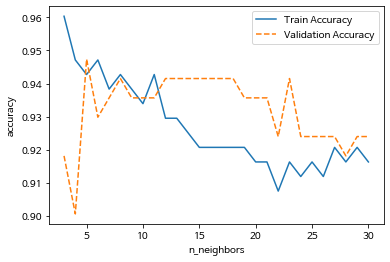

In [34]:
plt.plot(para_n_neighbors, train_accuracy, linestyle='-', label="Train Accuracy")
plt.plot(para_n_neighbors, validation_accuracy, linestyle='--', label='Validation Accuracy')
plt.ylabel('accuracy'); plt.xlabel('n_neighbors')
plt.legend()

In [35]:
n_neighbors=5
#군집이 5 일때, validation set의 정확도가 가장 높으며 train set과의 차이도 작다.

In [36]:
train_accuracy=[]; validation_accuracy=[]
para_n_neighbors=[i for i in range(3,31)]*2

para_weights=(['uniform'])*28+(['distance']*28)

for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights):
    
    knn=KNeighborsClassifier(n_neighbors=v_n_neighbors, weights=v_weights)
    knn.fit(df_train_x,df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    validation_accuracy.append(knn.score(df_validation_x,df_validation_y))
    
df_accuracy_weights=pd.DataFrame()
df_accuracy_weights['Neighbors']=para_n_neighbors
df_accuracy_weights['Weights']=para_weights
df_accuracy_weights['TrainAccuracy']=train_accuracy
df_accuracy_weights["ValidationAccuracy"]=validation_accuracy
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,ValidationAccuracy
0,3,uniform,0.960,0.918
1,4,uniform,0.947,0.901
2,5,uniform,0.943,0.947
3,6,uniform,0.947,0.930
4,7,uniform,0.938,0.936
5,8,uniform,0.943,0.942
6,9,uniform,0.938,0.936
7,10,uniform,0.934,0.936
8,11,uniform,0.943,0.936
9,12,uniform,0.930,0.942


In [37]:
df_accuracy_weights_pivot=df_accuracy_weights.pivot(index='Neighbors',columns='Weights',
                                                   values=['TrainAccuracy','ValidationAccuracy'])
df_accuracy_weights_pivot


TrainAccuracy           ValidationAccuracy          
Weights        distance   uniform           distance   uniform
Neighbors                                                     
3                   1.0  0.960352           0.923977  0.918129
4                   1.0  0.947137           0.912281  0.900585
5                   1.0  0.942731           0.935673  0.947368
6                   1.0  0.947137           0.929825  0.929825
7                   1.0  0.938326           0.929825  0.935673
8                   1.0  0.942731           0.941520  0.941520
9                   1.0  0.938326           0.935673  0.935673
10                  1.0  0.933921           0.941520  0.935673
11                  1.0  0.942731           0.929825  0.935673
12                  1.0  0.929515           0.929825  0.941520
13                  1.0  0.929515           0.935673  0.941520
14                  1.0  0.925110           0.941520  0.941520
15                  1.0  0.920705           0.941520  0.941520
16                  1.0  0.920705           0.941520  0.941520
17                  1.0  0.920705           0.941520  0.941520
18                  1.0  0.920705           0.935673  0.941520
19                  1.0  0.920705           0.935673  0.935673
20                  1.0  0.916300           0.935673  0.935673
21                  1.0  0.916300           0.941520  0.935673
22                  1.0  0.907489           0.941520  0.923977
23                  1.0  0.916300           0.941520  0.941520
24                  1.0  0.911894           0.935673  0.923977
25                  1.0  0.916300           0.935673  0.923977
26                  1.0  0.911894           0.929825  0.923977
27                  1.0  0.920705           0.935673  0.923977
28                  1.0  0.916300           0.929825  0.918129
29                  1.0  0.920705           0.923977  0.923977
30                  1.0  0.916300           0.929825  0.923977

In [38]:
level0=df_accuracy_weights_pivot.columns.get_level_values(0)
level1=df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns=level0+"_"+level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,ValidationAccuracy_distance,ValidationAccuracy_uniform
Neighbors,,,,
3,1.0,0.960352,0.923977,0.918129
4,1.0,0.947137,0.912281,0.900585
5,1.0,0.942731,0.935673,0.947368
6,1.0,0.947137,0.929825,0.929825
7,1.0,0.938326,0.929825,0.935673


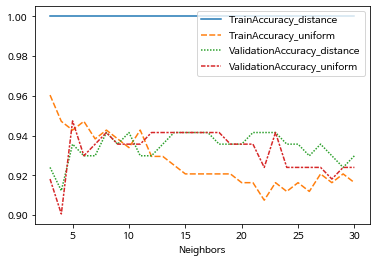

In [39]:
sns.lineplot(data=df_accuracy_weights_pivot)

In [40]:
#가중치가 distance일때 train 데이터의 모델 정확도가 1로 과대적합이므로 uniform 선택.
weights='uniform'

In [41]:
train_accuracy=[]; validation_accuracy=[]
para_n_neighbors=[i for i in range(3,31)]*3

para_metric=['minkowski']*28+['euclidean']*28+['manhattan']*28

for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    
    knn=KNeighborsClassifier(n_neighbors=v_n_neighbors, metric=v_metric, weights='uniform')
    knn.fit(df_train_x,df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    validation_accuracy.append(knn.score(df_validation_x,df_validation_y))
    
df_accuracy_metric=pd.DataFrame()
df_accuracy_metric['Neighbors']=para_n_neighbors
df_accuracy_metric['Metric']=para_metric
df_accuracy_metric['TrainAccuracy']=train_accuracy
df_accuracy_metric["ValidationAccuracy"]=validation_accuracy
df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,ValidationAccuracy
0,3,minkowski,0.960,0.918
1,4,minkowski,0.947,0.901
2,5,minkowski,0.943,0.947
3,6,minkowski,0.947,0.930
4,7,minkowski,0.938,0.936
...,...,...,...,...
79,26,manhattan,0.912,0.906
80,27,manhattan,0.916,0.906
81,28,manhattan,0.921,0.901
82,29,manhattan,0.916,0.924


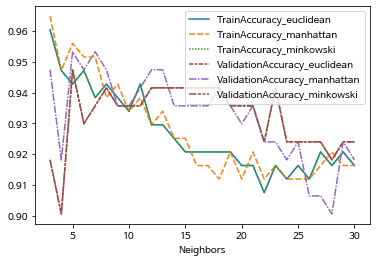

In [42]:
df_accuracy_metric_pivot=df_accuracy_metric.pivot(index='Neighbors',columns='Metric',
                                                   values=['TrainAccuracy','ValidationAccuracy'])

level0=df_accuracy_metric_pivot.columns.get_level_values(0)
level1=df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns=level0+"_"+level1
sns.lineplot(data=df_accuracy_metric_pivot)

In [43]:
metric='manhattan'
#거리 계산 방법이 manhattan 일때 validation 정확도가 euclidian 과 minkowski 보다 상위에 위치함을 볼 수 있다.


In [44]:
knn_model=KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='manhattan')
                    
knn_model.fit(df_train_x, df_train_y)
y_pred=knn_model.predict(df_test_x)

print('train data accuracy:{0:.3f}\n'.format(knn_model.score(df_train_x,df_train_y)))

print('validation data accuracy:{0:.3f}\n'.format(knn_model.score(df_validation_x,df_validation_y)))

print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

train data accuracy:0.956

validation data accuracy:0.953

Confusion matrix:
[[98  4]
 [10 59]]


In [45]:
y_pred=knn_model.predict(df_test_x)
print('Accuracy on test set:{0:.3f}\n'.format(knn_model.score(df_test_x,df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

Accuracy on test set:0.918

Confusion matrix:
[[98  4]
 [10 59]]


In [46]:
'''
Accuracy on training set:0.956
Accuracy on validation set:0.953
Accuracy on test set:0.918
Confusion matrix:
[[98  4]
 [10 59]]
 
최종적으로 n_neighbors=5, weights=uniform, metric=manhattan로 parameter를 선택하였으며 
test set의 정확도는 0.918로 서포트벡터머신보다는 약간 낮게 나왔다.

confusion matrix를 살펴보면, 악성인데 양성으로 예측한개수는 4이고, 양성인데 악성으로 잘못 예측한 것은 10이다.
유방암인데 유방암이 아니라고 예측한 경우가 4건이 생겼다.
'''

'\nAccuracy on training set:0.956\nAccuracy on validation set:0.953\nAccuracy on test set:0.918\nConfusion matrix:\n[[98  4]\n [10 59]]\n \n최종적으로 n_neighbors=5, weights=uniform, metric=manhattan로 parameter를 선택하였으며 \ntest set의 정확도는 0.918로 서포트벡터머신보다는 약간 낮게 나왔다.\n\nconfusion matrix를 살펴보면, 악성인데 양성으로 예측한개수는 4이고, 양성인데 악성으로 잘못 예측한 것은 10이다.\n유방암인데 유방암이 아니라고 예측한 경우가 4건이 생겼다.\n'

# 인공신경망

In [47]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [48]:
df_raw=pd.read_csv('/home/pirl/test/4 weeks/유방암.csv')

In [49]:
df_raw.isnull().sum()

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [50]:
df_raw_y=df_raw['diagnosis']
df_raw_x=df_raw.drop('diagnosis', axis=1, inplace=False)

df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.6, random_state=1234)
df_validation_x,df_test_x,df_validation_y,df_test_y=train_test_split(df_test_x,df_test_y,test_size=0.5, random_state=1234)
print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("validation data X size:{}".format(df_validation_x.shape))
print("validation data Y size:{}".format(df_validation_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))

train data X size:(227, 30)
train data Y size:(227,)
validation data X size:(171, 30)
validation data Y size:(171,)
test data X size:(171, 30)
test data Y size:(171,)


In [51]:
nn_uncustomized=MLPClassifier(random_state=1234)
nn_uncustomized.fit(df_train_x,df_train_y)
print('Accuracy on training set:{:.3f}'.format(nn_uncustomized.score(df_train_x,df_train_y)))

print('Accuracy on validation set:{:.3f}'.format(nn_uncustomized.score(df_validation_x,df_validation_y)))



Accuracy on training set:0.947
Accuracy on validation set:0.901


In [52]:
nn_uncustomized

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1234, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [53]:
train_accuracy=[]; validation_accuracy=[]
para_hidden=[20*hidden for hidden in range(1,9)]

for v_hidden in para_hidden:
    nn=MLPClassifier(hidden_layer_sizes=v_hidden, random_state=1234)
    nn.fit(df_train_x,df_train_y)
    train_accuracy.append(nn.score(df_train_x,df_train_y))
    validation_accuracy.append(nn.score(df_validation_x,df_validation_y))
    
df_accuracy_hidden=pd.DataFrame()
df_accuracy_hidden['HiddenLayer']=para_hidden
df_accuracy_hidden['TrainAccuracy']=train_accuracy
df_accuracy_hidden['ValidationAccuracy']=validation_accuracy
df_accuracy_hidden.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,HiddenLayer,TrainAccuracy,ValidationAccuracy
0,20,0.881,0.895
1,40,0.930,0.895
2,60,0.938,0.924
3,80,0.943,0.924
4,100,0.947,0.901
5,120,0.925,0.906
6,140,0.934,0.895
7,160,0.912,0.860


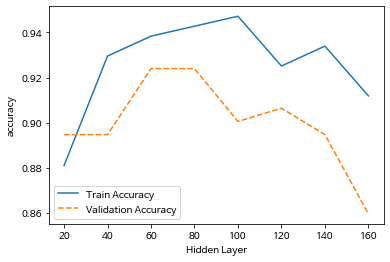

In [54]:
plt.plot(para_hidden, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_hidden, validation_accuracy, linestyle='--', label='Validation Accuracy')
plt.ylabel('accuracy'); plt.xlabel('Hidden Layer')
plt.legend()

In [55]:
#은닉층 2개일때
train_accuracy=[]; validation_accuracy=[]
para_hidden=[20*hidden for hidden in range(1,9)]

for v_hidden in para_hidden:
    nn=MLPClassifier(hidden_layer_sizes=(v_hidden,v_hidden), random_state=1234)
    nn.fit(df_train_x,df_train_y)
    train_accuracy.append(nn.score(df_train_x,df_train_y))
    validation_accuracy.append(nn.score(df_validation_x,df_validation_y))
    
df_accuracy_hidden=pd.DataFrame()
df_accuracy_hidden['HiddenLayer']=para_hidden
df_accuracy_hidden['TrainAccuracy']=train_accuracy
df_accuracy_hidden['ValidationAccuracy']=validation_accuracy
df_accuracy_hidden.round(3)

,HiddenLayer,TrainAccuracy,ValidationAccuracy
0,20,0.894,0.842
1,40,0.938,0.930
2,60,0.952,0.912
3,80,0.921,0.860
4,100,0.938,0.883
5,120,0.916,0.877
6,140,0.925,0.883
7,160,0.916,0.912


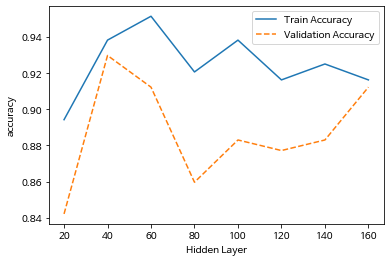

In [56]:
plt.plot(para_hidden, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_hidden, validation_accuracy, linestyle='--', label='Validation Accuracy')
plt.ylabel('accuracy'); plt.xlabel('Hidden Layer')
plt.legend()

In [57]:

#은닉층이 두개일때, hidden layer 가 40일때 train 정확도가 0.938이고 validation 정확도가 0.930으로
#가장 정확도가 높다.

In [58]:
train_accuracy=[]; validation_accuracy=[]

para_function=['logistic', 'tanh','relu']
for v_function in para_function:
    nn=MLPClassifier(activation=v_function,random_state=1234)
    nn.fit(df_train_x,df_train_y)
    train_accuracy.append(nn.score(df_train_x,df_train_y))
    validation_accuracy.append(nn.score(df_validation_x,df_validation_y))
    
df_accuracy_function=pd.DataFrame()
df_accuracy_function['ActivationFuction']=para_function
df_accuracy_function['TrainAccuracy']=train_accuracy
df_accuracy_function['ValidationAccuracy']=validation_accuracy
df_accuracy_function.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,ActivationFuction,TrainAccuracy,ValidationAccuracy
0,logistic,0.947,0.906
1,tanh,0.934,0.889
2,relu,0.947,0.901


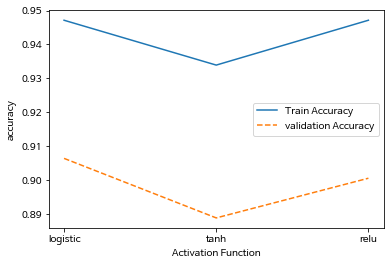

In [59]:
plt.plot(para_function, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_function, validation_accuracy, linestyle='--', label='validation Accuracy')
plt.ylabel('accuracy'); plt.xlabel('Activation Function')
plt.legend()

In [60]:
#logistic 함수 적용시 모델의 정확도가 제일 높음. 그러나 scale변환 후 모델의 성능 비교 필요

In [61]:
v_feature_name=df_train_x.columns
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_raw_x)
df_scaled=pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [62]:
df_scaled_train_x,df_scaled_test_x=train_test_split(df_scaled,test_size=0.6,random_state=1234)
df_scaled_validation_x,df_scaled_test_x=train_test_split(df_scaled_test_x, test_size=0.5, random_state=1234)
print('train data X size:{}'.format(df_scaled_train_x.shape))
print("validation data X size:{}".format(df_scaled_validation_x.shape))
print('test data X size:{}'.format(df_scaled_test_x.shape))




train data X size:(227, 30)
validation data X size:(171, 30)
test data X size:(171, 30)


In [63]:
nn_scaled=MLPClassifier(random_state=1234)
nn_scaled.fit(df_scaled_train_x,df_train_y)

print('Accuracy on training set:{:.3f}'.format(nn_scaled.score(df_scaled_train_x,df_train_y)))

print('Accuracy on validation set:{:.3f}'.format(nn_scaled.score(df_scaled_validation_x,df_validation_y)))



Accuracy on training set:0.996
Accuracy on validation set:0.971


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [64]:
#scale 변환을 했을때, training set과 validation set 모두 정확도가 더 높아진 것을 확인 할 수 있다.
#변환 전 정확도
#Accuracy on training set:0.947
#Accuracy on validation set:0.901

In [65]:
train_accuracy=[]; validation_accuracy=[]
para_hidden=[20*hidden for hidden in range(1,11)]

for v_hidden in para_hidden:
    nn=MLPClassifier(hidden_layer_sizes=(v_hidden,v_hidden), random_state=1234)
    
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    validation_accuracy.append(nn.score(df_scaled_validation_x, df_validation_y))

df_accuracy_hidden=pd.DataFrame()
df_accuracy_hidden['HiddenLayer']=para_hidden
df_accuracy_hidden['TrainAccuracy']=train_accuracy
df_accuracy_hidden['ValidationAccuracy']=validation_accuracy
df_accuracy_hidden.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,HiddenLayer,TrainAccuracy,ValidationAccuracy
0,20,0.996,0.965
1,40,0.996,0.971
2,60,1.000,0.971
3,80,1.000,0.971
4,100,1.000,0.971
5,120,1.000,0.965
6,140,1.000,0.971
7,160,1.000,0.965
8,180,1.000,0.965
9,200,1.000,0.971


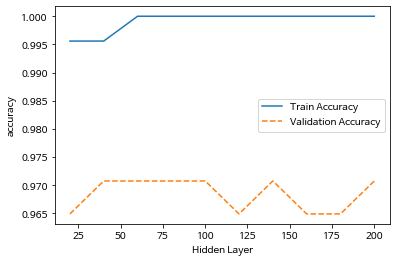

In [66]:
plt.plot(para_hidden, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_hidden, validation_accuracy, linestyle='--', label='Validation Accuracy')
plt.ylabel('accuracy'); plt.xlabel('Hidden Layer')
plt.legend()

In [67]:
hidden_layer_sizes=40
# 40일때 validation 의 정확도가 높아지고 train 정확도와의 차이도 가장 작으므로 40 선택

In [68]:
train_accuracy=[]; validation_accuracy=[]

para_function=['logistic', 'tanh','relu']
for v_function in para_function:
    nn=MLPClassifier(activation=v_function,hidden_layer_sizes=(40,40),random_state=1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    validation_accuracy.append(nn.score(df_scaled_validation_x,df_validation_y))
    
df_accuracy_function=pd.DataFrame()
df_accuracy_function['ActivationFuction']=para_function
df_accuracy_function['TrainAccuracy']=train_accuracy
df_accuracy_function['ValidationAccuracy']=validation_accuracy
df_accuracy_function.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,ActivationFuction,TrainAccuracy,ValidationAccuracy
0,logistic,0.996,0.965
1,tanh,0.996,0.965
2,relu,0.996,0.971


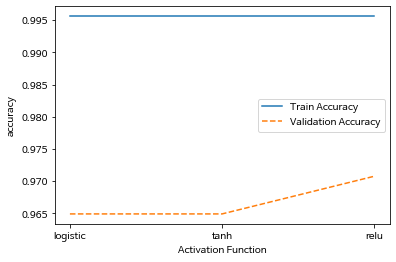

In [69]:
plt.plot(para_function, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_function, validation_accuracy, linestyle='--', label='Validation Accuracy')
plt.ylabel('accuracy'); plt.xlabel('Activation Function')
plt.legend()

In [70]:
# relu일 때 validation의 정확도가 가장 높다. 따라서 relu 선택.
activation='relu'

In [71]:
train_accuracy=[]; validation_accuracy=[]

para_solver=['lbfgs','sgd','adam']
for v_solver in para_solver:
    nn=MLPClassifier(solver=v_solver, activation='relu',hidden_layer_sizes=(40,40),random_state=1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    validation_accuracy.append(nn.score(df_scaled_validation_x,df_validation_y))
    
df_accuracy_solver=pd.DataFrame()
df_accuracy_solver['Solver']=para_solver
df_accuracy_solver['TrainAccuracy']=train_accuracy
df_accuracy_solver['ValidationAccuracy']=validation_accuracy
df_accuracy_solver.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,Solver,TrainAccuracy,ValidationAccuracy
0,lbfgs,1.000,0.953
1,sgd,0.974,0.959
2,adam,0.996,0.971


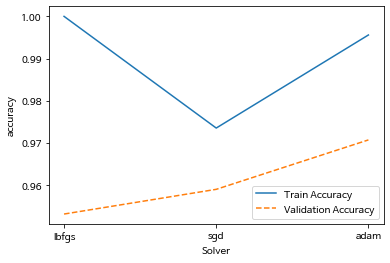

In [72]:
plt.plot(para_solver, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_solver, validation_accuracy, linestyle='--', label='Validation Accuracy')
plt.ylabel('accuracy'); plt.xlabel('Solver')
plt.legend()

In [73]:
solver='adam'
#adam이 최적화모델이 가장 높은 정확도를 보임. adam 선택

In [74]:
train_accuracy=[]; validation_accuracy=[]
para_batch=[20*batch for batch in range(1,10)]

for v_batch in para_batch:
    nn=MLPClassifier(batch_size=v_batch, solver='adam', activation='relu', 
                     hidden_layer_sizes=(40,40), random_state=1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    validation_accuracy.append(nn.score(df_scaled_validation_x,df_validation_y))
    
df_accuracy_batch=pd.DataFrame()
df_accuracy_batch['Mini Batch']=para_batch
df_accuracy_batch['TrainAccuracy']=train_accuracy
df_accuracy_batch["ValidationAccuracy"]=validation_accuracy
df_accuracy_batch.round(3)

,Mini Batch,TrainAccuracy,ValidationAccuracy
0,20,1.000,0.971
1,40,1.000,0.965
2,60,1.000,0.965
3,80,1.000,0.965
4,100,1.000,0.965
5,120,1.000,0.965
6,140,1.000,0.965
7,160,1.000,0.965
8,180,0.996,0.965


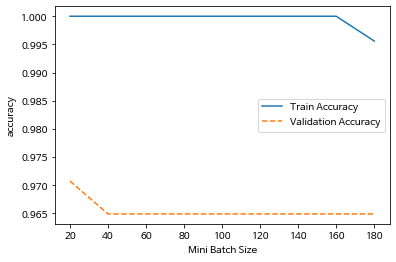

In [75]:
plt.plot(para_batch, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_batch, validation_accuracy, linestyle='--', label='Validation Accuracy')
plt.ylabel('accuracy'); plt.xlabel('Mini Batch Size')
plt.legend()

In [76]:
batch_size=20
#mini batch 사이즈가 커질수록 validation 정확성이 낮아지는 것을 확인할 수 있다.
#따라서 mini batch 20 선택

In [77]:
nn_final=MLPClassifier(hidden_layer_sizes=(40,40),activation='relu',solver='adam',batch_size=20,   
                     random_state=1234)

nn_final.fit(df_scaled_train_x, df_train_y)
y_pred=nn_final.predict(df_scaled_validation_x)

print('Accuracy on training set:{0:.3f}\n'.format(nn_final.score(df_scaled_train_x,df_train_y)))

print('Accuracy on validation set:{0:.3f}\n'.format(nn_final.score(df_scaled_validation_x,df_validation_y)))

print("Confusion matrix:\n{}".format(confusion_matrix(df_validation_y,y_pred)))

Accuracy on training set:1.000

Accuracy on validation set:0.971

Confusion matrix:
[[114   0]
 [  5  52]]


In [78]:
y_pred=nn_final.predict(df_scaled_test_x)
print('Accuracy on test set:{0:.3f}\n'.format(nn_final.score(df_scaled_test_x,df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

Accuracy on test set:0.959

Confusion matrix:
[[101   1]
 [  6  63]]


In [80]:
'''
Accuracy on training set:1.000
Accuracy on validation set:0.971
Accuracy on test set:0.959
Confusion matrix:
[[101   1]
 [  6  63]]
 
최종적으로 hidden_layer_sizes=(40,40),activation='relu',solver='adam',batch_size=20로 parameter를 선택하였으며 
test set의 정확도는 0.959이다.

confusion matrix를 살펴보면, 악성인데 양성으로 예측한개수는 1이고, 양성인데 악성으로 잘못 예측한 것은 6이다.
유방암인데 유방암이 아니라고 예측한 경우가 6건이 생겼다.
'''

"\nAccuracy on training set:1.000\nAccuracy on validation set:0.971\nAccuracy on test set:0.959\nConfusion matrix:\n[[101   1]\n [  6  63]]\n \n최종적으로 hidden_layer_sizes=(40,40),activation='relu',solver='adam',batch_size=20로 parameter를 선택하였으며 \ntest set의 정확도는 0.959이다.\n\nconfusion matrix를 살펴보면, 악성인데 양성으로 예측한개수는 1이고, 양성인데 악성으로 잘못 예측한 것은 6이다.\n유방암인데 유방암이 아니라고 예측한 경우가 6건이 생겼다.\n"

# SVM,  KNN, 인공신경망

In [81]:
'''
SVM
Accuracy on training set:0.996
Accuracy on validation set:0.959
Accuracy on test set:0.947
Confusion matrix:
[[102   0]
 [  9  60]]
 

KNN
Accuracy on training set:0.956
Accuracy on validation set:0.953
Accuracy on test set:0.918
Confusion matrix:
[[98  4]
 [10 59]]
 

인공신경망
Accuracy on training set:1.000
Accuracy on validation set:0.971
Accuracy on test set:0.959
Confusion matrix:
[[101   1]
 [  6  63]]
 

KNN<SVM<인공신경망 순으로 TEST SET의 정확도가 높아졌다.
유방암 데이터의 경우, 유방암인데 유방암이 아니라고 오분류하는게 가장 위험할 것이다. 
FN의 갯수가 인공신경망이 6으로 가장 낮고, 정확도도 가장 높으므로 이 경우에는 인공신경망 모델을 사용하는것이
가장 좋을것으로 생각된다.
'''

'\nSVM\nAccuracy on training set:0.996\nAccuracy on validation set:0.959\nAccuracy on test set:0.947\nConfusion matrix:\n[[102   0]\n [  9  60]]\n \n\nKNN\nAccuracy on training set:0.956\nAccuracy on validation set:0.953\nAccuracy on test set:0.918\nConfusion matrix:\n[[98  4]\n [10 59]]\n \n\n인공신경망\nAccuracy on training set:1.000\nAccuracy on validation set:0.971\nAccuracy on test set:0.959\nConfusion matrix:\n[[101   1]\n [  6  63]]\n \n\nKNN<SVM<인공신경망 순으로 TEST SET의 정확도가 높아졌다.\n유방암 데이터의 경우, 유방암인데 유방암이 아니라고 오분류하는게 가장 위험할 것이다. \nFN의 갯수가 인공신경망이 6으로 가장 낮고, 정확도도 가장 높으므로 이 경우에는 인공신경망 모델을 사용하는것이\n가장 좋을것으로 생각된다.\n'